In [37]:
# Steps to follow

# 0.Preprocess + EDA + Feature_Engineering
# 1.Extract input and output columns
# 2.Scale the values(Standrdscaler)
# 3.Train test split
# 4.train the model
# 5.Evaluate the model/model selection
# 6.Deploy the model

In [ ]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/placement (1).csv')

In [3]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [5]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
 import matplotlib.pyplot as plt

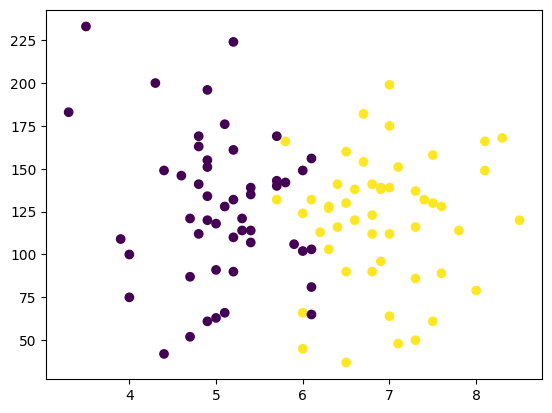

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [15]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [17]:
# Cross validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [18]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler


In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train) # Value between -1 to 1

In [21]:
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression


In [23]:
clf = LogisticRegression()
# Model training
clf.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = clf.predict(X_test)

In [29]:
y_test

,placement
16,0
33,0
21,1
42,1
98,1
77,1
12,0
4,0
28,0
31,0


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

90.0

<Axes: >

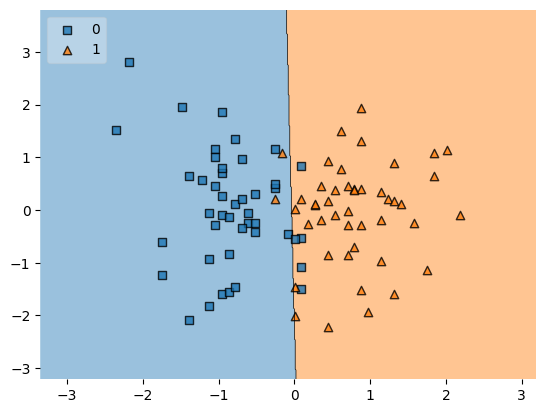

In [34]:
# The divisor line
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [35]:
import pickle


In [36]:
pickle.dump(clf,open('model.pkl','wb')) # saving the model